In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
file_path="RawData.xlsx"
df=pd.read_excel(file_path)

df['Worldwide Gross'] = df['Worldwide Gross'].str.replace(',', '')  # Remove commas
df['Worldwide Gross'] = df['Worldwide Gross'].str.replace('$', '')  # Remove dollar signs (if applicable)

df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Worldwide Gross'] = pd.to_numeric(df['Worldwide Gross'], errors='coerce')

In [34]:
df=df[(df['Rating']>=5) & (df['Rating']<=9)]
max_value = df['Worldwide Gross'].max()

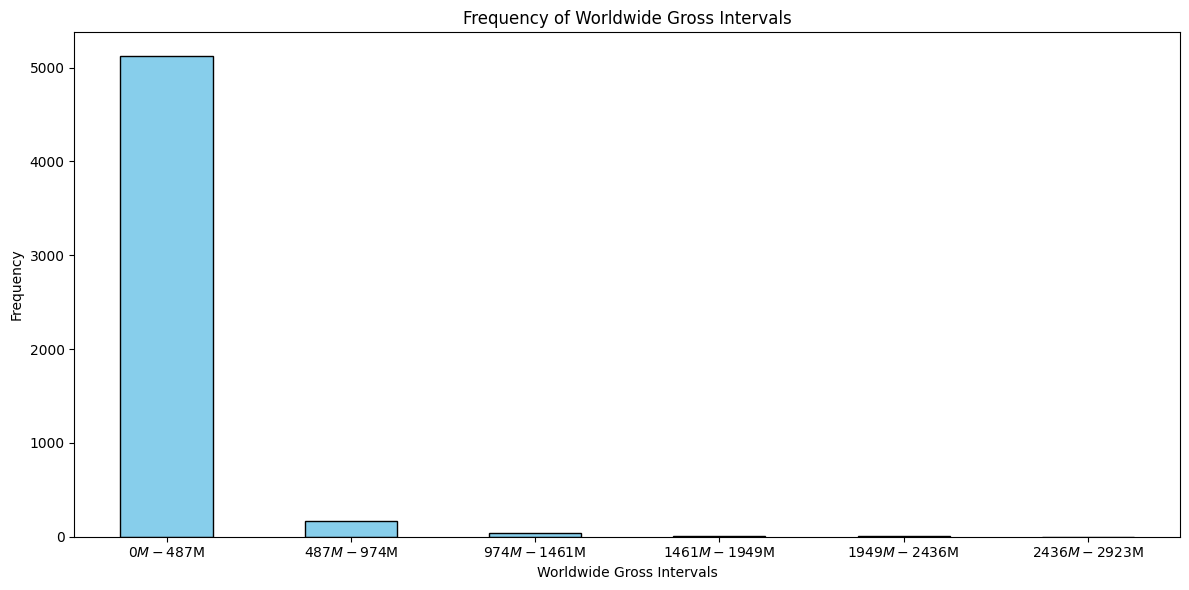

In [35]:
# Manually define bins to ensure the first interval starts at 0
bins = [0, max_value / 6, 2 * max_value / 6, 3 * max_value / 6, 4 * max_value / 6,5*max_value / 6, max_value]

# Create intervals using the custom bins
df['Gross_Interval'], bins = pd.cut(df['Worldwide Gross'], bins=bins, retbins=True, include_lowest=True)

# Format bin labels
formatted_intervals = [f"${int(left/1_000_000)}M - ${int(right/1_000_000)}M" 
                       for left, right in zip(bins[:-1], bins[1:])]

# Replace intervals with formatted labels
df['Gross_Interval'] = df['Gross_Interval'].cat.rename_categories(formatted_intervals)

# Group by intervals and count frequencies
frequency = df['Gross_Interval'].value_counts(sort=False)

# Plot the frequency graph
plt.figure(figsize=(12,6))
frequency.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency of Worldwide Gross Intervals')
plt.xlabel('Worldwide Gross Intervals')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

In [27]:
df=df[(df['Rating']>=5) & (df['Rating']<=9)]
df['Worldwide Gross']=(df['Worldwide Gross']-df['Worldwide Gross'].mean())/df['Worldwide Gross'].std()
df_gross=df[['Rating','Worldwide Gross']]
df_gross=df_gross.dropna()
print(df_gross.head())


#scaler = StandardScaler()
#standardized_data = scaler.fit_transform(df_gross)

#standardized_df = pd.DataFrame(standardized_data, columns=['Rating', 'Worldwide Gross'])
print(df_gross)

   Rating  Worldwide Gross
0     9.0         4.721374
1     8.8         3.845805
2     8.7         3.350494
3     8.9         4.098982
4     9.0         5.386755
      Rating  Worldwide Gross
0        9.0         4.721374
1        8.8         3.845805
2        8.7         3.350494
3        8.9         4.098982
4        9.0         5.386755
...      ...              ...
6233     6.1        -0.474259
6234     6.8        -0.443082
6235     5.3        -0.474863
6236     6.7        -0.462806
6237     6.7        -0.454656

[5339 rows x 2 columns]


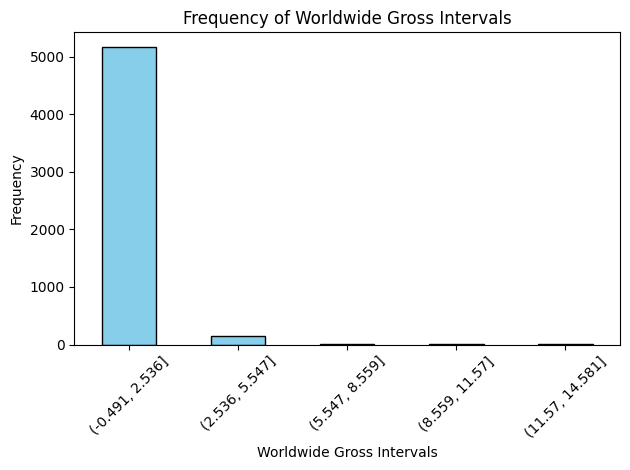

In [28]:
# Manually define bins to ensure the first interval starts at 0
max_value = df['Worldwide Gross'].max()
bins = [0, max_value / 5, 2 * max_value / 5, 3 * max_value / 5, 4 * max_value / 5, max_value]

# Automatically create intervals (bins) using a histogram approach
df['Gross_Interval'], bins = pd.cut(df['Worldwide Gross'], bins=5, retbins=True, include_lowest=True)

# Group by intervals and count frequencies
frequency = df['Gross_Interval'].value_counts(sort=False)

# Plot the frequency graph
frequency.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency of Worldwide Gross Intervals')
plt.xlabel('Worldwide Gross Intervals')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [19]:
#df=df[(df['Rating']>=5) & (df['Rating']<=9)]
#df['Worldwide Gross']=(df['Worldwide Gross']-df['Worldwide Gross'].mean())/df['Worldwide Gross'].std()
df_gross=df[['Rating','Worldwide Gross']]
df_gross=df_gross.dropna()
print(df_gross.head())



#scaler = StandardScaler()
#standardized_data = scaler.fit_transform(df_gross)

#standardized_df = pd.DataFrame(standardized_data, columns=['Rating', 'Worldwide Gross'])
print(df_gross)


   Rating  Worldwide Gross
0     9.0     1.009057e+09
1     8.8     8.390306e+08
2     8.7     7.428462e+08
3     8.9     8.881951e+08
4     9.0     1.138268e+09
      Rating  Worldwide Gross
0        9.0     1.009057e+09
1        8.8     8.390306e+08
2        8.7     7.428462e+08
3        8.9     8.881951e+08
4        9.0     1.138268e+09
...      ...              ...
6233     6.1     1.177540e+05
6234     6.8     6.172042e+06
6235     5.3     5.250000e+02
6236     6.7     2.341847e+06
6237     6.7     3.924527e+06

[5666 rows x 2 columns]


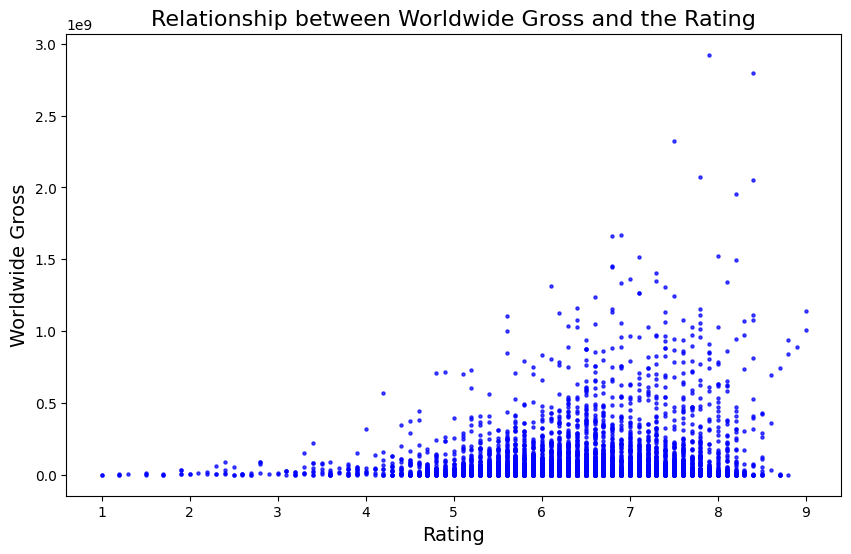

In [20]:
# Créer le graphique
plt.figure(figsize=(10, 6))



plt.scatter(df_gross['Rating'], df_gross['Worldwide Gross'], color='blue', alpha=0.7, s=5)
#plt.scatter(df_gross['Worldwide Gross'], df_gross['Rating'], color='blue', alpha=0.7, s=5)

#plt.xscale('log')


plt.title('Relationship between Worldwide Gross and the Rating', fontsize=16)
plt.ylabel('Worldwide Gross', fontsize=14)
plt.xlabel('Rating', fontsize=14)


plt.show()

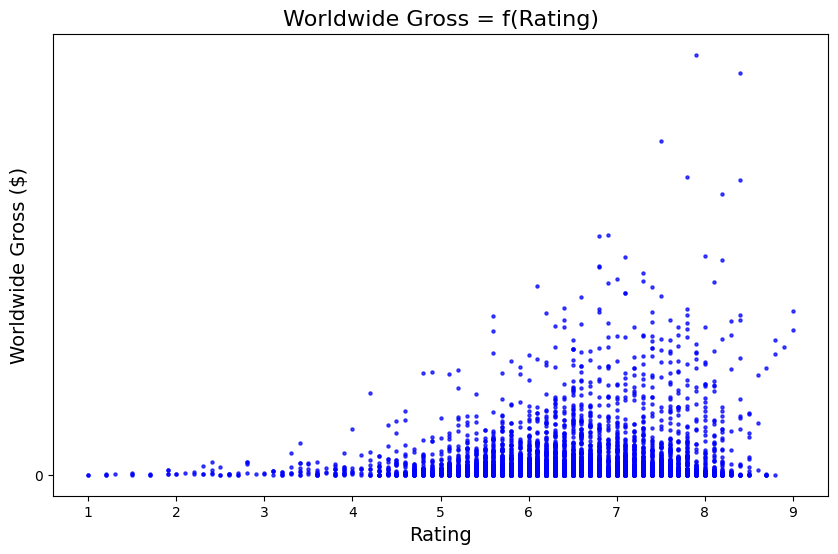

In [21]:
#Rating in function of worldwide gross


plt.figure(figsize=(10, 6))
plt.scatter(df_gross['Rating'],df_gross['Worldwide Gross'], color='blue', alpha=0.7, s=5)


plt.title('Worldwide Gross = f(Rating)', fontsize=16)
plt.ylabel('Worldwide Gross ($)', fontsize=14)
plt.xlabel('Rating', fontsize=14)


plt.yticks([0])


plt.show()

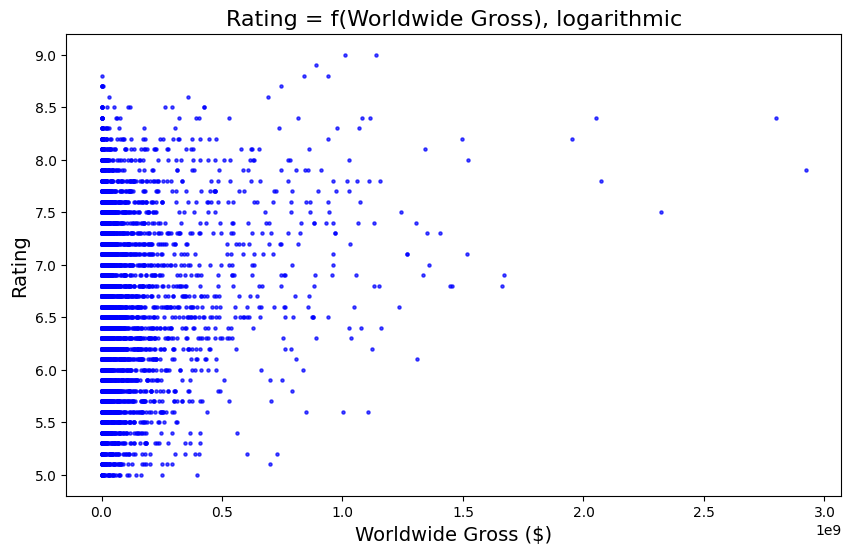

In [16]:
# Créer le graphique
plt.figure(figsize=(10, 6))



plt.scatter(df_gross['Worldwide Gross'], df_gross['Rating'], color='blue', alpha=0.7, s=5)


#plt.xscale('log')


plt.title('Rating = f(Worldwide Gross), logarithmic', fontsize=16)
plt.xlabel('Worldwide Gross ($)', fontsize=14)
plt.ylabel('Rating', fontsize=14)


plt.show()